In [1]:
def initialize_parameters(layers):
    np.random.seed(11)
    parameters = {}
    for i in range(1, len(layers)):
        parameters[f'W{i}'] = np.random.randn(layers[i], layers[i-1])
        parameters[f'b{i}'] = np.zeros((layers[i], 1))
    return parameters

In [2]:
def relu(X):
    return X * (X > 0)

In [3]:
def forward_propagation(X, parameters, activation='relu'):
#     print(X.shape)
    cache = {'A0': X}
    A_prev = X
    num_layers = len(parameters)//2
    for i in range(1, num_layers):
        Wi = parameters[f'W{i}']
        bi = parameters[f'b{i}']
        Zi = np.dot(Wi, A_prev) + bi
        cache[f'Z{i}'] = Zi
        if activation == 'relu':
            Ai = relu(Zi)
        cache[f'A{i}'] = Ai
        A_prev = Ai
    
    Wl = parameters[f'W{num_layers}']
    bl = parameters[f'b{num_layers}']
    Zl = np.dot(Wl, A_prev) + bl
    cache[f'Z{num_layers}'] = Zl
    
    # softmax activation
    Zl = np.e ** Zl
    Al = Zl/np.sum(Zl, axis=0)
    cache[f'A{num_layers}'] = Al
    
    return cache

In [4]:
def compute_cost(Y, Y_cap):
    m = Y.shape[1]
    return -np.mean(np.log(np.sum(Y * Y_cap, axis=0)))

In [5]:
def drelu(X):
    return X > 0.0

In [6]:
def backward_propagation(X, Y, parameters, cache, activation='relu'):
    grads = {}
    num_layers = len(parameters)//2
    dZi = cache[f'A{num_layers}'] - Y
    m = Y.shape[1]
#     print(f'num parameters = {len(parameters)}')
    for i in range(num_layers, 0, -1):
        dWi = np.dot(dZi, cache[f'A{i-1}'].T)/m
        dbi = np.sum(dZi, axis=1).reshape(-1, 1)/m
        grads[f'dW{i}'] = dWi
        grads[f'db{i}'] = dbi
        
        if i == 1:
            break
        # get dZ for previous layer
        dA_previ = np.dot(parameters[f'W{i}'].T, dZi)
        if activation == 'relu':
            dZ_previ = dA_previ*drelu(cache[f'Z{i-1}'])
        dZi = dZ_previ
    
    return grads

In [7]:
def gradient_descent(grads, parameters, learning_rate):
    num_layers = len(parameters)//2
    for i in range(1, num_layers+1):
        parameters[f'W{i}'] -= learning_rate * grads[f'dW{i}']
        parameters[f'b{i}'] -= learning_rate * grads[f'db{i}']
    return parameters

In [8]:
def training_accuracy(X, Y, parameters, activation='relu'):
    cache = forward_propagation(X, parameters, activation)
    m = Y.shape[1]
    a = np.argmax(Y, axis=0)
    b = np.argmax(cache[f'A{len(parameters)//2}'], axis=0)
    return np.mean(a == b) * 100

In [9]:
def model_nn(X, Y, iterations=3000, learning_rate=0.009 , C=3, activation='relu'):
    parameters = initialize_parameters([2, 6, 6, 8, C])
    for i in range(iterations):
        cache = forward_propagation(X, parameters, activation)
        cost = compute_cost(Y, cache[f'A{len(parameters)//2}'])
        if i % 1000 == 0:
            print(f'cost after {i} iterations = {cost}')
        grads = backward_propagation(X, Y, parameters, cache, activation)
        parameters = gradient_descent(grads, parameters, learning_rate)
    return parameters

In [10]:
def predict(parameters, X, activation='relu'):
    cache = forward_propagation(X, parameters, activation)
    num_layers = len(parameters)//2
    return np.argmax(cache[f'A{num_layers}'], axis=0)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y,s=20 ,cmap=plt.cm.Spectral)

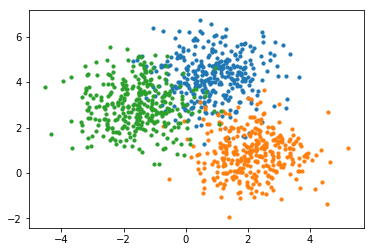

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
classes = 3
N = 1000
# X, y = make_blobs(n_samples=600, centers=classes, n_features=2, cluster_std=0.5, random_state=2)
X, y = sklearn.datasets.make_blobs(n_samples=N, random_state=0, n_features=2, centers=classes)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], s=10)
# show plot
pyplot.show()

from sklearn.preprocessing import OneHotEncoder

# one hot encoding
Y = y.reshape((-1,1))
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y_train = enc.transform(Y).toarray().T
Y_train[:,:4]
X, Y = X.T, Y_train

In [14]:
parameters = model_nn(X, Y, iterations=50000,C=classes,learning_rate=0.009, activation='relu')

cost after 0 iterations = 1.9304558559094187
cost after 1000 iterations = 0.5555899561626881
cost after 2000 iterations = 0.26849695238785304
cost after 3000 iterations = 0.14514011246763586
cost after 4000 iterations = 0.09882693868054397
cost after 5000 iterations = 0.07611807522780598
cost after 6000 iterations = 0.06236585116494839
cost after 7000 iterations = 0.053227636972952304
cost after 8000 iterations = 0.04673570990596435
cost after 9000 iterations = 0.04194803383770222
cost after 10000 iterations = 0.038357424108177204
cost after 11000 iterations = 0.035522831078253665
cost after 12000 iterations = 0.03320399936888144
cost after 13000 iterations = 0.031274746259026556
cost after 14000 iterations = 0.029654342998594724
cost after 15000 iterations = 0.028246420166395687
cost after 16000 iterations = 0.027027146895248454
cost after 17000 iterations = 0.02597444656908035
cost after 18000 iterations = 0.025055220474511836
cost after 19000 iterations = 0.024226235018998885
cost a

99.33333333333333
(386, 385)


Text(0.5,1,'Decision Boundary for hidden layer size 4')

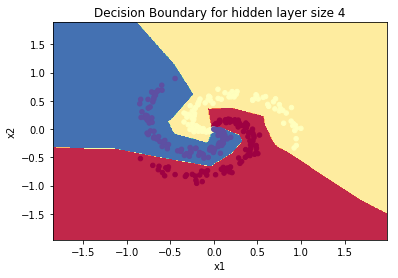

In [15]:
print(training_accuracy(X, Y, parameters))
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.argmax(Y, axis=0))
plt.title("Decision Boundary for hidden layer size " + str(4))

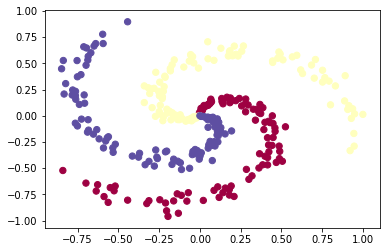

In [13]:
N = 100 # number of points per class
D = 2 # dimensionality
K = classes= 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
Y = y.reshape((-1,1))
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y_train = enc.transform(Y).toarray().T
Y_train[:,:4]
X, Y = X.T, Y_train